In [27]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [39]:
target_values = [-1/5.0, 0, -16.67, 1, 0, -0.01, -0.2]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row[:-1])
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = "D:/ASE2020-ExperimentData/Overtake_2021_01_24_NSGA_III_results_20000"
# file_folder_orgin = "D:/ASE2020-ExperimentData/TurnRight_2021_01_24_NSGA_III_results_20000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_Random_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
            
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1 51  0  0  0  1 91] 144 144


In [40]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.01432633420822397
4 0.03125


In [41]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,-0.000000,3.523385,-10.942294,1.000000,0.0,-0.000000,-0.000000
1,-0.000000,7.019583,-15.908845,1.000000,0.0,-0.000000,-0.000000
2,-0.000000,3.500973,-14.538884,1.000000,0.0,-0.002620,-0.135542
3,-0.000000,3.500921,-14.548313,1.000000,0.0,-0.000000,-0.000000
4,-0.000000,5.226798,-16.500000,1.000000,0.0,-0.005639,-0.039611
...,...,...,...,...,...,...,...
139,-0.000000,3.501033,-11.324043,0.000000,0.0,-0.004433,-0.032137
140,-0.000000,3.500147,-10.433229,0.182635,0.0,-0.004123,-0.047101
141,-0.000000,3.540720,-14.552586,1.000000,0.0,-0.000000,-0.000000
142,-0.000000,3.523524,-9.973742,0.193510,0.0,-0.004607,-0.047945


D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


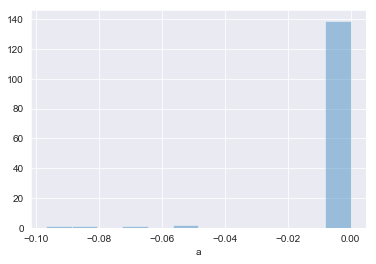

In [42]:
sns.distplot(data_result['a'],kde = False)

In [43]:
data_result.min()

a    -0.096721
b     3.500000
c   -17.264521
d     0.000000
e     0.000000
f    -0.007162
g    -0.228348
dtype: float64

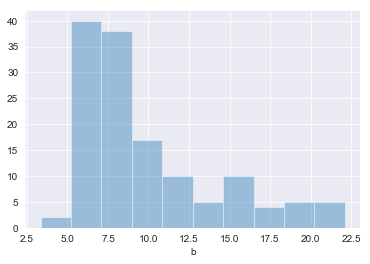

In [33]:
sns.distplot(data_result['b'],kde = False)

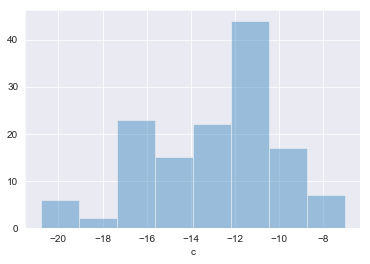

In [34]:
sns.distplot(data_result['c'],kde = False)

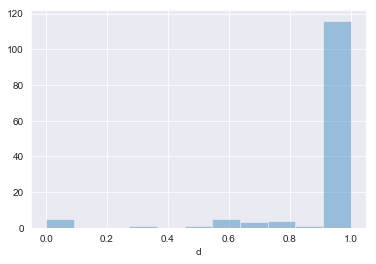

In [35]:
sns.distplot(data_result['d'],kde = False)

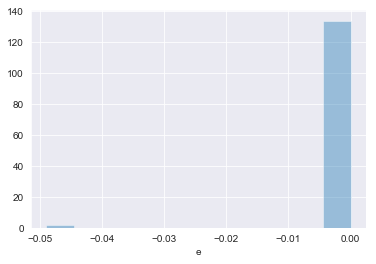

In [36]:
sns.distplot(data_result['e'],kde = False)

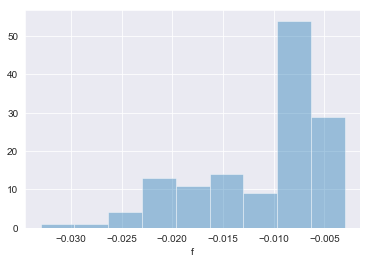

In [37]:
sns.distplot(data_result['f'],kde = False)

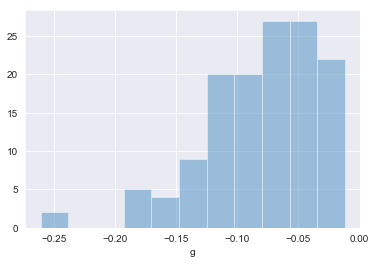

In [38]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d   e         f         g
a  1.000000  0.092541  0.038016  0.020960 NaN  0.139784  0.312586
b  0.092541  1.000000 -0.234759  0.134289 NaN  0.156303  0.211337
c  0.038016 -0.234759  1.000000 -0.525426 NaN -0.009562  0.103496
d  0.020960  0.134289 -0.525426  1.000000 NaN  0.579016  0.243260
e       NaN       NaN       NaN       NaN NaN       NaN       NaN
f  0.139784  0.156303 -0.009562  0.579016 NaN  1.000000  0.615996
g  0.312586  0.211337  0.103496  0.243260 NaN  0.615996  1.000000


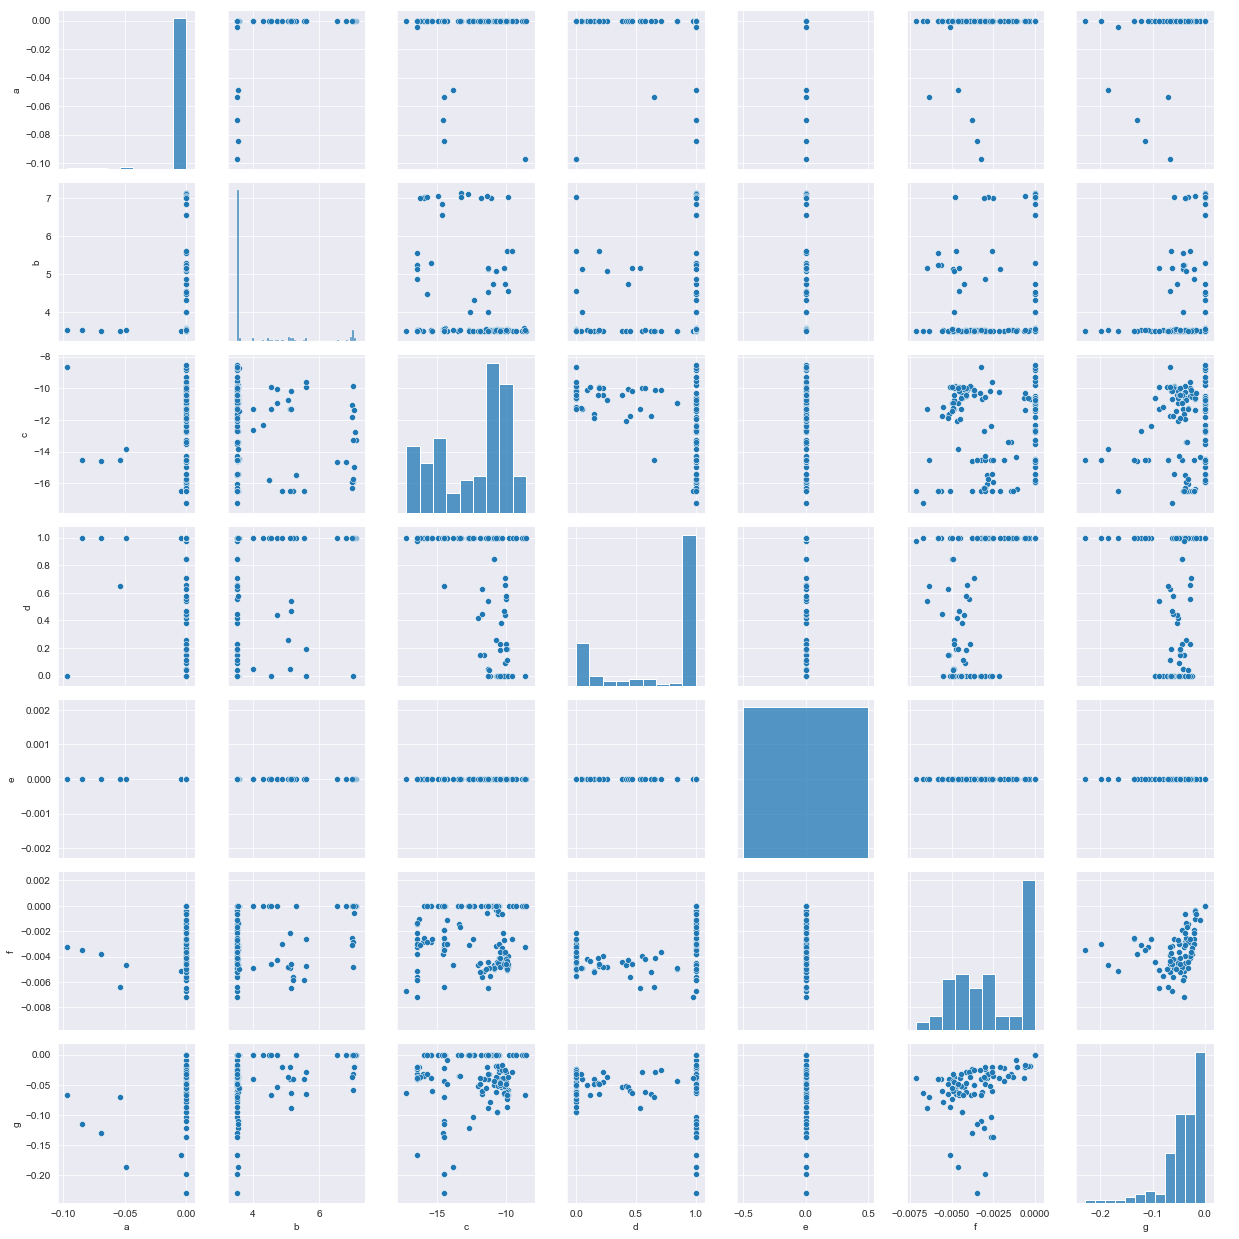

In [13]:
print(data_result.corr())
sns.pairplot(data_result)

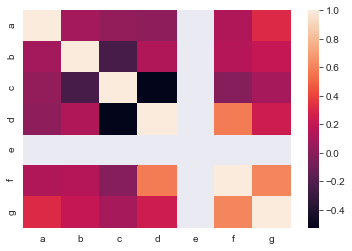

In [14]:
sns.heatmap(data_result.corr())

ValueError: The condensed distance matrix must contain only finite values.

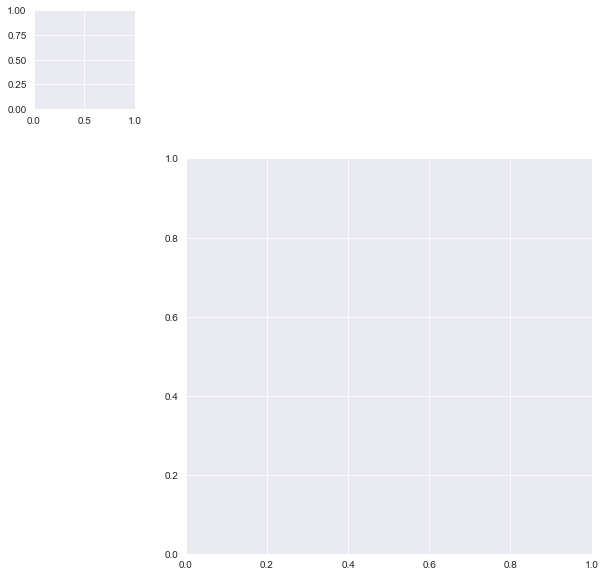

In [15]:
sns.clustermap(data_result.corr())

In [ ]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)